In [1]:
# Read the file
import pandas as pd
titanik_data = pd.read_csv('titanik.csv')

# Check sums by Sex
all_female_passengers_count = titanik_data.loc[titanik_data['Sex'] == 'female'].shape[0]
all_male_passengers_count = titanik_data.loc[titanik_data['Sex'] == 'male'].shape[0]
any_gender_count = titanik_data.shape[0]

print(f"All female passengers = {all_female_passengers_count}")
print(f"All male passengers = {all_male_passengers_count}")
print(f"All passengers = {any_gender_count}")

if (all_female_passengers_count + all_male_passengers_count) == any_gender_count:
    print('Every passenger has a gender')
else:
    print(f'Number of passenger without gender = {any_gender_count - all_female_passengers_count - all_male_passengers_count}')

All female passengers = 314
All male passengers = 577
All passengers = 891
Every passenger has a gender


In [2]:
all_female_passengers_survived = titanik_data.loc[(titanik_data['Sex'] == 'female') & (titanik_data['Survived'] == 1)].shape[0]
print(f"Survived female passengers = {all_female_passengers_survived}")

all_male_passengers_survived = titanik_data.loc[(titanik_data['Sex'] == 'male') & (titanik_data['Survived'] == 1)].shape[0]
print(f"Survived male passengers = {all_male_passengers_survived}")

Survived female passengers = 233
Survived male passengers = 109


In [3]:
# Check sums by Pclass
first_class_count = titanik_data[titanik_data.Pclass == 1].shape[0]
second_class_count = titanik_data[titanik_data.Pclass == 2].shape[0]
third_class_count = titanik_data[titanik_data.Pclass == 3].shape[0]
any_class_count = titanik_data.shape[0]
print(f"First class = {first_class_count}")
print(f"Second class = {second_class_count}")
print(f"Third class = {third_class_count}")
print(f"All passengers = {any_class_count}")
if first_class_count + second_class_count + third_class_count == any_class_count:
    print('Every passenger has a class')
else:
    print(f'Number of passenger without class = {any_class_count - first_class_count - second_class_count - third_class_count}')

First class = 216
Second class = 184
Third class = 491
All passengers = 891
Every passenger has a class


In [4]:
# Check sums by Age
empty_age_count = titanik_data[titanik_data.Age.isnull()].shape[0]
number_age_count = titanik_data[titanik_data.Age.notnull()].shape[0]
any_age_count = titanik_data.shape[0]
print(f"Passengers with empty Age = {empty_age_count}")
print(f"Passengers with defined Age = {number_age_count}")
print(f"All passengers = {any_age_count}")

Passengers with empty Age = 177
Passengers with defined Age = 714
All passengers = 891


In [5]:
titanik_data[['PassengerId', 'Name', 'Ticket', 'Sex', 'Survived', 'Pclass', 'Embarked']].nunique()

PassengerId    891
Name           891
Ticket         681
Sex              2
Survived         2
Pclass           3
Embarked         3
dtype: int64

In [6]:
passengers_died = titanik_data[titanik_data.Survived == 0].shape[0]
passengers_survived = titanik_data[titanik_data.Survived == 1].shape[0]
survival_ratio = passengers_survived / (passengers_died + passengers_survived)
print(f"Survived = {round(survival_ratio*100)}%")

Survived = 38%


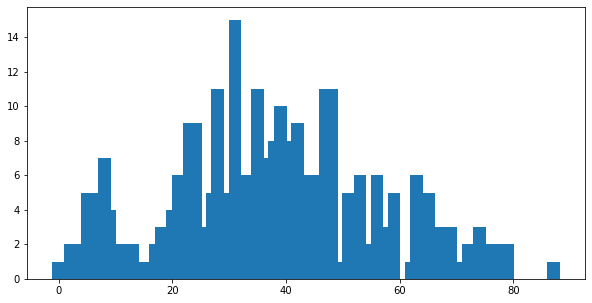

In [7]:
from matplotlib import pyplot as plt

passengers_dead = titanik_data[(titanik_data.Survived == 0) & titanik_data.Age.notnull()]
passengers_survived = titanik_data[(titanik_data.Survived == 1) & titanik_data.Age.notnull()]
passengers_all = titanik_data[titanik_data.Age.notnull()]

age = passengers_all.groupby(['Age']).count()['PassengerId']
survived_count = passengers_survived.groupby(['Age']).count()['PassengerId']
dead_count = passengers_dead.groupby(['Age']).count()['PassengerId']

new_dict = {}
for key, value in age.items():
    if key in survived_count:
        survived_dict_value = survived_count[key]
    else:
        survived_dict_value = 0
    #if key in dead_count:
    #    dead_dict_value = dead_count[key]
    #else:
    #    dead_dict_value = 0
    #new_dict[key] = [survived_dict_value, dead_dict_value]
    new_dict[key] = survived_dict_value
#print(new_dict)

import matplotlib.pyplot as plt

names = list(new_dict.keys())
values = list(new_dict.values())
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.bar(range(len(new_dict)), values, width = 2.25)
plt.show()

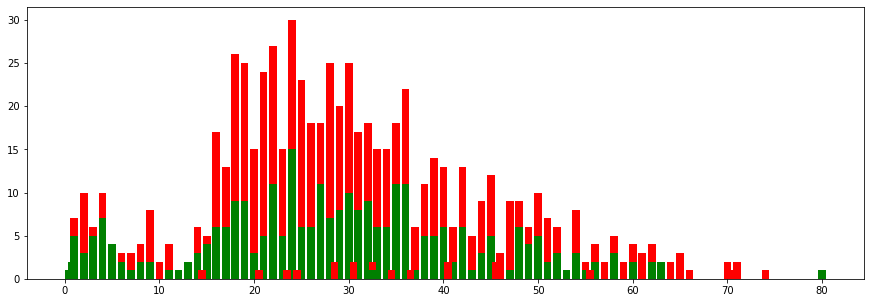

In [8]:
import matplotlib.pyplot as plt

# List of ages
age = passengers_all['Age'].unique().tolist()
age.sort()

# List of survived
passengers_survived = titanik_data[(titanik_data.Survived == 1) & titanik_data.Age.notnull()]
survived_count = passengers_survived.groupby(['Age']).count()['PassengerId']
temp = survived_count.tolist()
survived = []
for key in age:
    if key in survived_count:
        survived.append(survived_count[key])
    else:
        survived.append(0)

# List of dead
passengers_dead = titanik_data[(titanik_data.Survived == 0) & titanik_data.Age.notnull()]
dead_count = passengers_dead.groupby(['Age']).count()['PassengerId']
temp = dead_count.tolist()
dead = []
for key in age:
    if key in dead_count:
        dead.append(dead_count[key])
    else:
        dead.append(0)

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.bar(age, survived, color='g')
plt.bar(age, dead, bottom=survived, color='r')
plt.show()

In [9]:
print(age)

[0.42, 0.67, 0.75, 0.83, 0.92, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 14.5, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 20.5, 21.0, 22.0, 23.0, 23.5, 24.0, 24.5, 25.0, 26.0, 27.0, 28.0, 28.5, 29.0, 30.0, 30.5, 31.0, 32.0, 32.5, 33.0, 34.0, 34.5, 35.0, 36.0, 36.5, 37.0, 38.0, 39.0, 40.0, 40.5, 41.0, 42.0, 43.0, 44.0, 45.0, 45.5, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 55.5, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 70.0, 70.5, 71.0, 74.0, 80.0]


In [10]:
print(survived)

[1, 1, 2, 2, 1, 5, 3, 5, 7, 4, 2, 1, 2, 2, 0, 1, 1, 2, 3, 0, 4, 6, 6, 9, 9, 3, 0, 5, 11, 5, 0, 15, 0, 6, 6, 11, 7, 0, 8, 10, 0, 8, 9, 1, 6, 6, 0, 11, 11, 0, 1, 5, 5, 6, 0, 2, 6, 1, 3, 5, 0, 0, 1, 6, 4, 5, 2, 3, 1, 3, 1, 0, 2, 0, 3, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1]


In [11]:
print(dead)

[0, 0, 0, 0, 0, 2, 7, 1, 3, 0, 1, 2, 2, 6, 2, 3, 0, 0, 3, 1, 1, 11, 7, 17, 16, 12, 1, 19, 16, 10, 1, 15, 1, 17, 12, 7, 18, 2, 12, 15, 2, 9, 9, 1, 9, 9, 1, 7, 11, 1, 5, 6, 9, 7, 2, 4, 7, 4, 6, 7, 2, 3, 8, 3, 2, 5, 5, 3, 0, 5, 1, 1, 2, 2, 2, 2, 2, 3, 2, 0, 2, 3, 1, 2, 1, 2, 1, 0]


In [12]:
surv_ration = []
for i in range(0, (len(survived))):
    surv_ration.append(round(100* survived[i]/(survived[i] + dead[i]), 2))
print(surv_ration)

[100.0, 100.0, 100.0, 100.0, 100.0, 71.43, 30.0, 83.33, 70.0, 100.0, 66.67, 33.33, 50.0, 25.0, 0.0, 25.0, 100.0, 100.0, 50.0, 0.0, 80.0, 35.29, 46.15, 34.62, 36.0, 20.0, 0.0, 20.83, 40.74, 33.33, 0.0, 50.0, 0.0, 26.09, 33.33, 61.11, 28.0, 0.0, 40.0, 40.0, 0.0, 47.06, 50.0, 50.0, 40.0, 40.0, 0.0, 61.11, 50.0, 0.0, 16.67, 45.45, 35.71, 46.15, 0.0, 33.33, 46.15, 20.0, 33.33, 41.67, 0.0, 0.0, 11.11, 66.67, 66.67, 50.0, 28.57, 50.0, 100.0, 37.5, 50.0, 0.0, 50.0, 0.0, 60.0, 0.0, 50.0, 0.0, 50.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0]


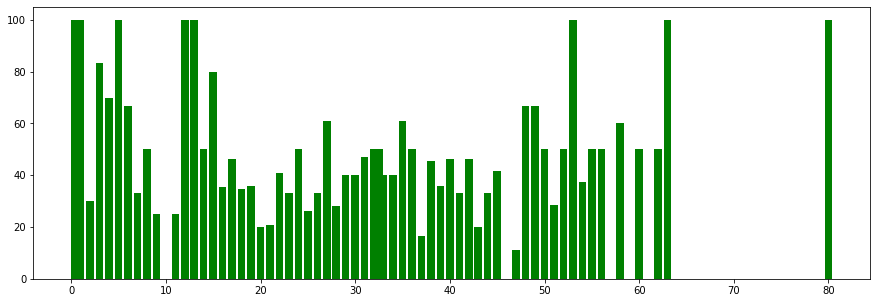

In [13]:
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.bar(age, surv_ration, color='g')
plt.show()

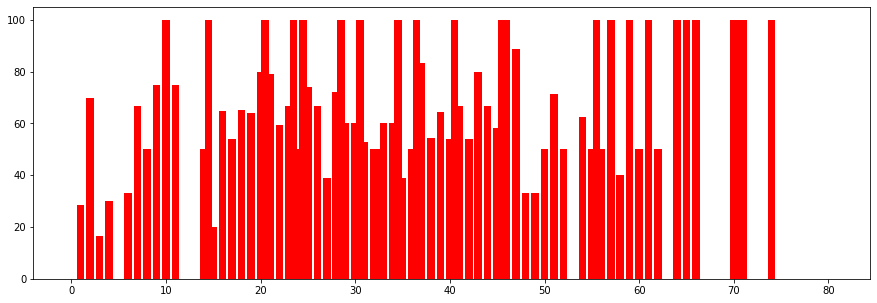

In [14]:
dead_ration = []
for i in range(0, (len(dead))):
    dead_ration.append(round(100* dead[i]/(dead[i] + survived[i]), 2))
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.bar(age, dead_ration, color='r')
plt.show()

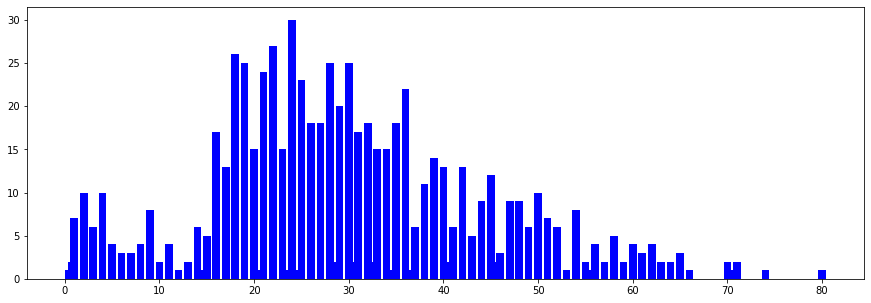

In [15]:
all_people = []
for i in range(0, (len(dead))):
    all_people.append(dead[i] + survived[i])
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.bar(age, all_people, color='b')
plt.show()

In [16]:
third_class_surv = titanik_data.loc[(titanik_data['Pclass'] == 3) &(titanik_data['Survived'] == 1)].shape[0]
third_class_all = titanik_data.loc[(titanik_data['Pclass'] == 3)].shape[0]
print(f"All 3rd class = {third_class_all}")
print(f"Survived 3rd class = {round(100 * third_class_surv/third_class_all)}%")

All 3rd class = 491
Survived 3rd class = 24%


In [17]:
second_class_surv = titanik_data.loc[(titanik_data['Pclass'] == 2) &(titanik_data['Survived'] == 1)].shape[0]
second_class_all = titanik_data.loc[(titanik_data['Pclass'] == 2)].shape[0]
print(f"All 2nd class = {second_class_all}")
print(f"Survived 2nd class = {round(100 * second_class_surv/second_class_all)}%")

All 2nd class = 184
Survived 2nd class = 47%


In [18]:
first_class_surv = titanik_data.loc[(titanik_data['Pclass'] == 1) &(titanik_data['Survived'] == 1)].shape[0]
first_class_all = titanik_data.loc[(titanik_data['Pclass'] == 1)].shape[0]
print(f"All 1st class = {first_class_all}")
print(f"Survived 1st class = {round(100 * first_class_surv/first_class_all)}%")

All 1st class = 216
Survived 1st class = 63%


In [19]:
third_class_surv_women = titanik_data.loc[(titanik_data['Pclass'] == 3) &(titanik_data['Survived'] == 1) & (titanik_data['Sex'] == 'female')].shape[0]
third_class_all_women = titanik_data.loc[(titanik_data['Pclass'] == 3) & (titanik_data['Sex'] == 'female')].shape[0]
print(f"All 3rd class women = {third_class_all_women}")
print(f"Survived 3rd class women = {round(100 * third_class_surv_women/third_class_all_women)}%")

third_class_surv_men = titanik_data.loc[(titanik_data['Pclass'] == 3) &(titanik_data['Survived'] == 1) & (titanik_data['Sex'] == 'male')].shape[0]
third_class_all_men = titanik_data.loc[(titanik_data['Pclass'] == 3) & (titanik_data['Sex'] == 'male')].shape[0]
print(f"All 3rd class men = {third_class_all_men}")
print(f"Survived 3rd class men = {round(100 * third_class_surv_men/third_class_all_men)}%")

All 3rd class women = 144
Survived 3rd class women = 50%
All 3rd class men = 347
Survived 3rd class men = 14%


In [20]:
second_class_surv_women = titanik_data.loc[(titanik_data['Pclass'] == 2) &(titanik_data['Survived'] == 1) & (titanik_data['Sex'] == 'female')].shape[0]
second_class_all_women = titanik_data.loc[(titanik_data['Pclass'] == 2) & (titanik_data['Sex'] == 'female')].shape[0]
print(f"All 3rd class women = {second_class_all_women}")
print(f"Survived 3rd class women = {round(100 * second_class_surv_women/second_class_all_women)}%")

second_class_surv_men = titanik_data.loc[(titanik_data['Pclass'] == 2) &(titanik_data['Survived'] == 1) & (titanik_data['Sex'] == 'male')].shape[0]
second_class_all_men = titanik_data.loc[(titanik_data['Pclass'] == 2) & (titanik_data['Sex'] == 'male')].shape[0]
print(f"All 3rd class men = {second_class_all_men}")
print(f"Survived 3rd class men = {round(100 * second_class_surv_men/second_class_all_men)}%")

All 3rd class women = 76
Survived 3rd class women = 92%
All 3rd class men = 108
Survived 3rd class men = 16%


In [21]:
first_class_surv_women = titanik_data.loc[(titanik_data['Pclass'] == 1) &(titanik_data['Survived'] == 1) & (titanik_data['Sex'] == 'female')].shape[0]
first_class_all_women = titanik_data.loc[(titanik_data['Pclass'] == 1) & (titanik_data['Sex'] == 'female')].shape[0]
print(f"All 1st class women = {first_class_all_women}")
print(f"Survived 1st class women = {round(100 * first_class_surv_women/first_class_all_women)}%")

first_class_surv_men = titanik_data.loc[(titanik_data['Pclass'] == 1) &(titanik_data['Survived'] == 1) & (titanik_data['Sex'] == 'male')].shape[0]
first_class_all_men = titanik_data.loc[(titanik_data['Pclass'] == 1) & (titanik_data['Sex'] == 'male')].shape[0]
print(f"All 1st class men = {first_class_all_men}")
print(f"Survived 1st class men = {round(100 * first_class_surv_men/first_class_all_men)}%")

All 1st class women = 94
Survived 1st class women = 97%
All 1st class men = 122
Survived 1st class men = 37%


In [26]:
passenger_class = ['First Class', 'Second Class', 'Third Class']
female_by_class_survived_percentage = [round(100 * first_class_surv_women/first_class_all_women), round(100 * second_class_surv_women/second_class_all_women), round(100 * third_class_surv_women/third_class_all_women)]
male_by_class_survived_percentage = [round(100 * first_class_surv_men/first_class_all_men), round(100 * second_class_surv_men/second_class_all_men), round(100 * third_class_surv_men/third_class_all_men)]

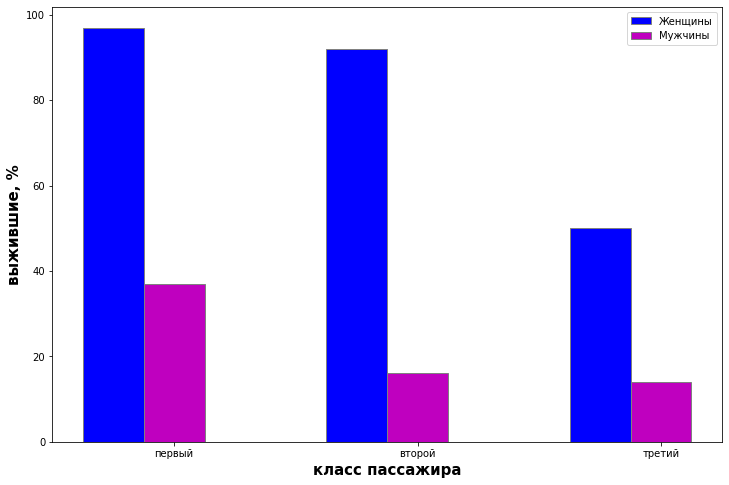

ПЕРВЫЙ КЛАСС женщины: 97%, мужчины: 37%
ВТОРОЙ КЛАСС женщины: 92%, мужчины: 16%
ТРЕТИЙ КЛАСС женщины: 50%, мужчины: 14%


In [56]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
passenger_class = ['первый', 'второй', 'третий']
female_by_class_survived_percentage = [round(100 * first_class_surv_women/first_class_all_women), round(100 * second_class_surv_women/second_class_all_women), round(100 * third_class_surv_women/third_class_all_women)]
male_by_class_survived_percentage = [round(100 * first_class_surv_men/first_class_all_men), round(100 * second_class_surv_men/second_class_all_men), round(100 * third_class_surv_men/third_class_all_men)]

# Set position of bar on X axis
br1 = np.arange(len(female_by_class_survived_percentage))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, female_by_class_survived_percentage, color ='b', width = barWidth,
		edgecolor ='grey', label ='Женщины')
plt.bar(br2, male_by_class_survived_percentage, color ='m', width = barWidth,
		edgecolor ='grey', label ='Мужчины')

# Adding Xticks
plt.xlabel('класс пассажира', fontweight ='bold', fontsize = 15)
plt.ylabel('выжившие, %', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(female_by_class_survived_percentage))],
		passenger_class)

plt.legend()
plt.show()

print(f"ПЕРВЫЙ КЛАСС женщины: {female_by_class_survived_percentage[0]}%, мужчины: {male_by_class_survived_percentage[0]}%")
print(f"ВТОРОЙ КЛАСС женщины: {female_by_class_survived_percentage[1]}%, мужчины: {male_by_class_survived_percentage[1]}%")
print(f"ТРЕТИЙ КЛАСС женщины: {female_by_class_survived_percentage[2]}%, мужчины: {male_by_class_survived_percentage[2]}%")